#### Data analysis notebook

Reads in the data files and plot results



In [1]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np


In [19]:
manager = RunManager("../run/rundb.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,ion,energy,fastSimulation,maxScatters,maxEnergy,sourceVolume,outputDir,outputFile,numEvents,numJobs,randomSeed,settingsFile,status
0,run_01,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240917_161721,std,10000,1,714114,settings.json,active
1,run_02,geantino,None,1. MeV,true,1,1.2 MeV,,/data/xenon/acolijn/G4FastSim/20240918_102454,fast,100000,1,82757,settings.json,active
2,run_03,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_102545,std,100000,1,552843,settings.json,active
3,run_04,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_103046,std,100000,1,521551,settings.json,active
4,run_05,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_143454,std,100000,1,777109,settings.json,active
5,run_06,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_150140,std,100000,1,219042,settings.json,active


In [26]:
# cut on the global event variables
lxe = 1 # liquid xenon

cut = lambda data: (data['ncomp'][:,lxe] + data['nphot'][:,lxe] + data['ncomp'][:,0] + data['nphot'][:,0] == 1 ) & (data['ndet'][:,lxe] == 1) & (data['ndet'][:,0] == 0)
# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < 1050.) & (np.abs(data['zh']) < 1104.) & (data['eh'] > 0.) & (data['id'] == lxe)
#cut_hit = lambda data: (data['eh'] > 0.)

fast = Geant4Analyzer("run_02", first_only=False)
fast.preprocess_data(cut=cut, cut_hit=cut_hit)

std = Geant4Analyzer("run_06", first_only=False)
std.preprocess_data(cut=cut, cut_hit=cut_hit)


Initialized Geant4Analyzer with run_id=run_02, label=
Loading data from ['/data/xenon/acolijn/G4FastSim/20240918_102454/fast_0.root']
Loading /data/xenon/acolijn/G4FastSim/20240918_102454/fast_0.root
Data loaded from 1 files
Data loaded from ['/data/xenon/acolijn/G4FastSim/20240918_102454/fast_0.root']
Initialized Geant4Analyzer with run_id=run_06, label=
Loading data from ['/data/xenon/acolijn/G4FastSim/20240918_150140/std_0.root']
Loading /data/xenon/acolijn/G4FastSim/20240918_150140/std_0.root
Data loaded from 1 files
Data loaded from ['/data/xenon/acolijn/G4FastSim/20240918_150140/std_0.root']


integral = 0.0
integral = 0.0


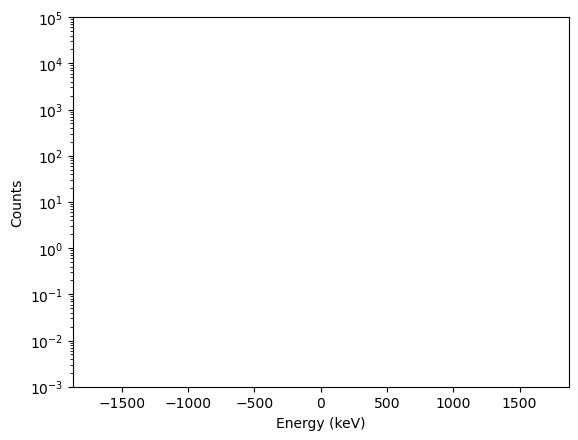

In [27]:
ax = std.plot_histogram("eh", bins=100, range=(-1700, 1700), show=False)
ax = fast.plot_histogram("eh", bins=100, range=(-1700, 1700), show=False, ax=ax)

ax.set_ylim(1e-3, 1e5)
ax.set_yscale('log')
plt.show()

integral = 698.0
integral = 748.185854910866


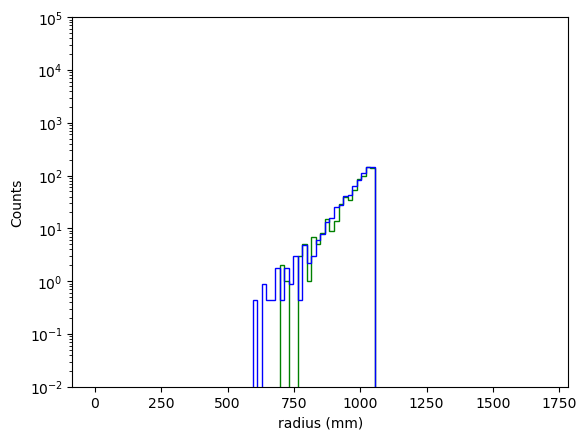

In [25]:
ax = std.plot_histogram("r", bins=100, range=(0, 1700), show=False)
ax = fast.plot_histogram("r", bins=100, range=(0, 1700), show=False, ax=ax)

ax.set_ylim(1e-2, 1e5)
ax.set_yscale('log')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 0

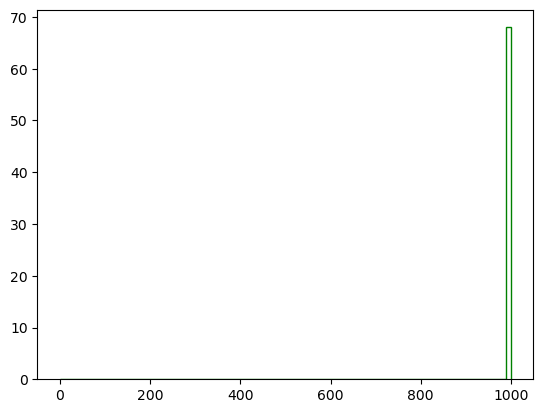

In [11]:
h = plt.hist(std.data['edet'][:,lxe], bins=100, range=(0, 1000), histtype='step', label='std')
h = plt.hist(fast.data['edet'][:,lxe], weights=np.exp(fast.data['w']),bins=100, range=(0, 1000), histtype='step', label='fast')
plt.yscale('log')

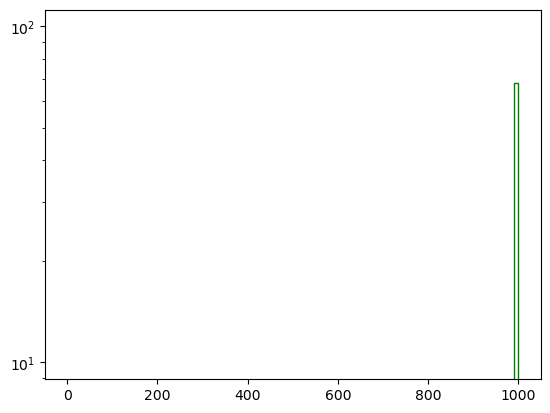

In [13]:
h = plt.hist(std.data['edet'][:,lxe], bins=100, range=(0, 1000), histtype='step', label='std')
plt.yscale('log')


In [ ]:
h = plt.hist(std.data['edet'][:,lxe], bins=100, range=(0, 1000), histtype='step', label='std')
